# Data Processing

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [462]:
dataTitanic = pd.read_csv("titanic_train.csv")

#for i in dataTitanic:
#  print(i, dataTitanic[i].dtypes)
#  if dataTitanic[i].isna().values.any() and dataTitanic[i].dtypes != object:
#      dataTitanic[i] = dataTitanic[i].fillna(dataTitanic[i].mean())

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 174
sibsp int64 0
parch int64 0
ticket object 0
fare float64 1
cabin object 659
embarked object 1
boat object 542
body float64 777
home.dest object 386
survived int64 0


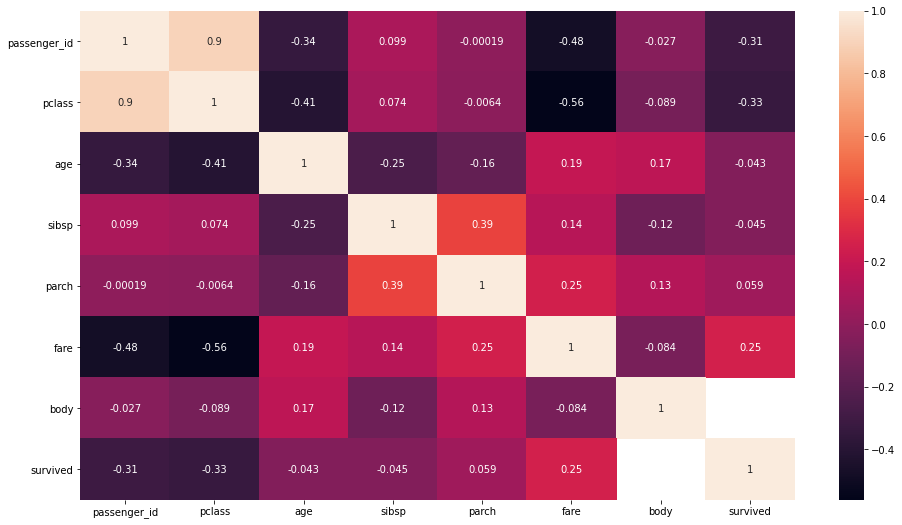

In [463]:
# missing values - age
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
dataTitanic["age"] = dataTitanic.groupby(["pclass"])["age"].transform("mean")

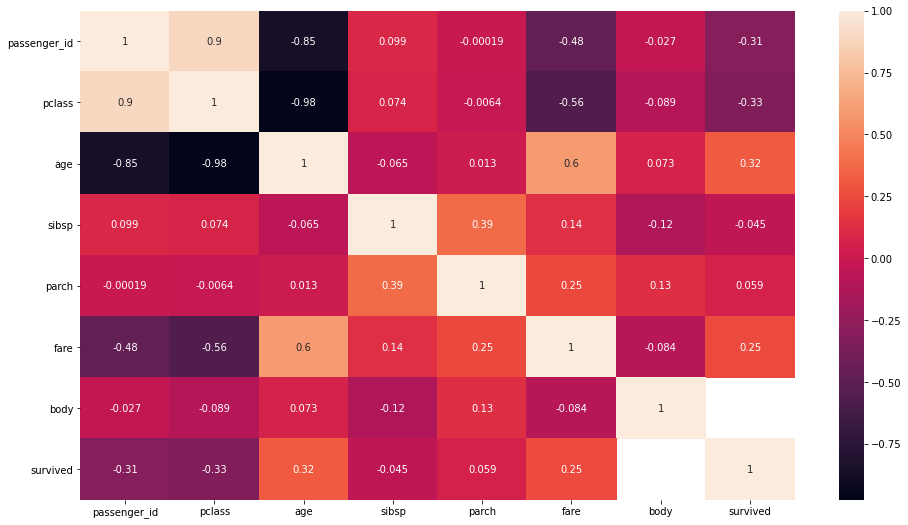

In [464]:
# missing values - fare
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
dataTitanic["fare"] = dataTitanic.groupby(["pclass"])["fare"].transform("mean")

In [0]:
# missing values - cabin
dataTitanic["cabin"] = dataTitanic["cabin"].fillna('U')


In [466]:
# missing values - embarked 
print(dataTitanic[dataTitanic['embarked'].isnull()])
dataTitanic['embarked'] = dataTitanic['embarked'].fillna('S')

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


     passenger_id  pclass                 name  ... body  home.dest  survived
109           168       1  Icard, Miss. Amelie  ...  NaN        NaN         1

[1 rows x 15 columns]
passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin object 0
embarked object 0
boat object 542
body float64 777
home.dest object 386
survived int64 0


In [467]:
# transform - cabin
print(dataTitanic["cabin"])
dataTitanic["cabin"] = dataTitanic["cabin"].map(lambda x: x[0])
print(dataTitanic["cabin"])


0        U
1        U
2        U
3        U
4        U
      ... 
845    C39
846    B37
847      U
848      U
849      U
Name: cabin, Length: 850, dtype: object
0      U
1      U
2      U
3      U
4      U
      ..
845    C
846    B
847    U
848    U
849    U
Name: cabin, Length: 850, dtype: object


In [0]:
# new column - Family Size
dataTitanic["famsize"] = dataTitanic["parch"] + dataTitanic["sibsp"] + 1

In [469]:
# convert nominal

encode = preprocessing.LabelEncoder()
dataTitanic["sex"] = encode.fit_transform(dataTitanic["sex"])
dataTitanic["embarked"] = encode.fit_transform(dataTitanic["embarked"])
dataTitanic["cabin"] = encode.fit_transform(dataTitanic["cabin"])

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


passenger_id int64 0
pclass int64 0
name object 0
sex int64 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin int64 0
embarked int64 0
boat object 542
body float64 777
home.dest object 386
survived int64 0
famsize int64 0


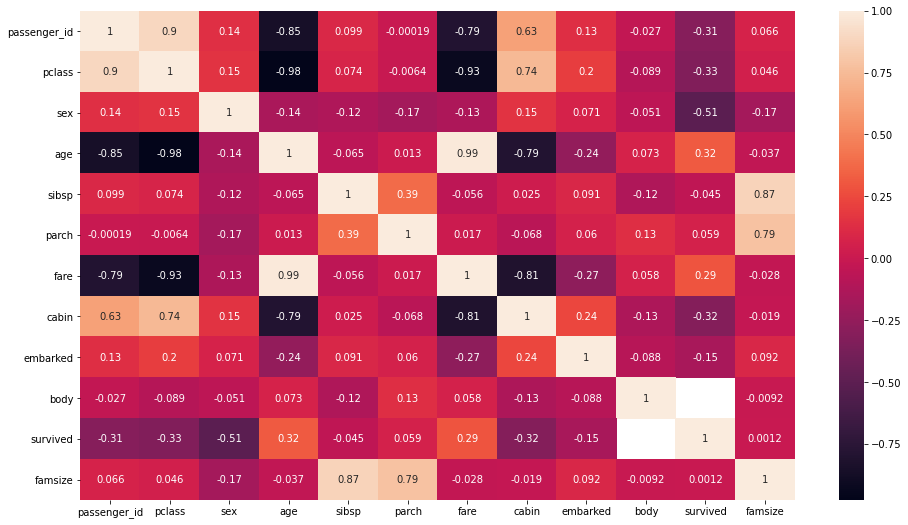

In [470]:
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)


# KNN

In [471]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))


Train set acc:  0.7823529411764706
Test set acc:  0.788235294117647


In [472]:
Ks = 30
accTrain = np.zeros((Ks-1))
accTest = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(XTrain, YTrain)
    CTest  = KNN.predict(XTest)
    CTrain  = KNN.predict(XTrain)
    accTrain[n - 1] = metrics.accuracy_score(YTrain, CTrain)
    accTest[n - 1] = metrics.accuracy_score(YTest, CTest)
    
print("Best  ACC Training : %.2f" % accTrain.max(), ", with k = ", accTrain.argmax() + 1)
print("Best  ACC Testing : %.2f" % accTest.max(), ", with k = ", accTest.argmax() + 1)



Best  ACC Training : 0.78 , with k =  3
Best  ACC Testing : 0.80 , with k =  14


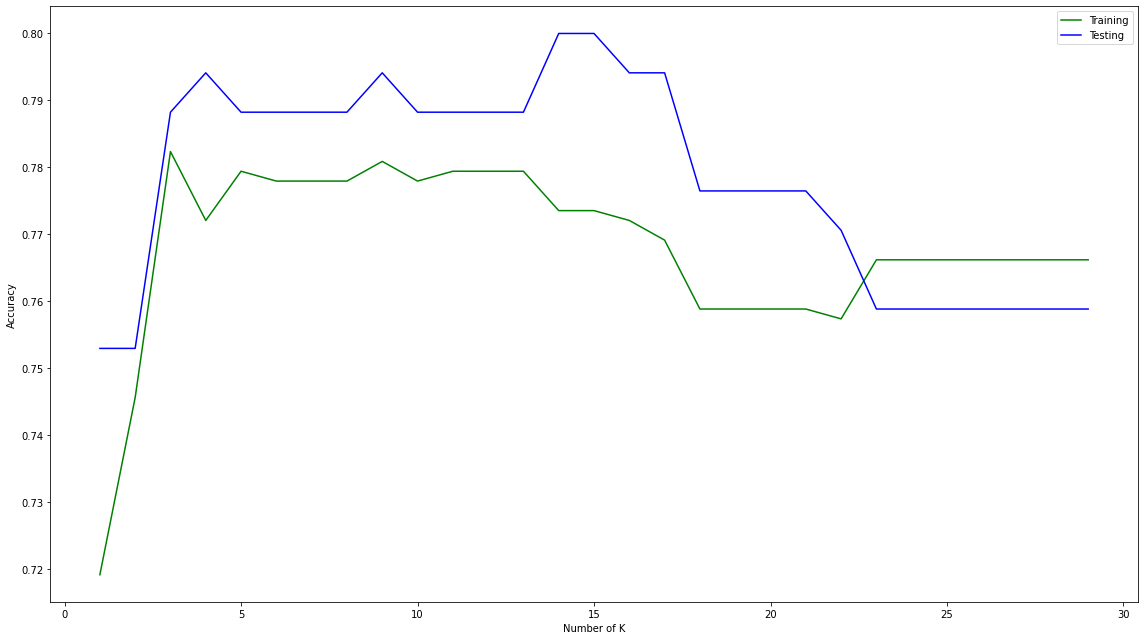

In [473]:
plt.plot(range(1,Ks), accTrain,"g")
plt.plot(range(1,Ks), accTest,"b")
plt.legend(("Training", "Testing"))
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.tight_layout()
plt.show()

# Logistic Regression

In [474]:
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7764705882352941
Test set acc:  0.7764705882352941


Train set acc:  0.9553571428571429
Test set acc:  0.9473684210526315


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


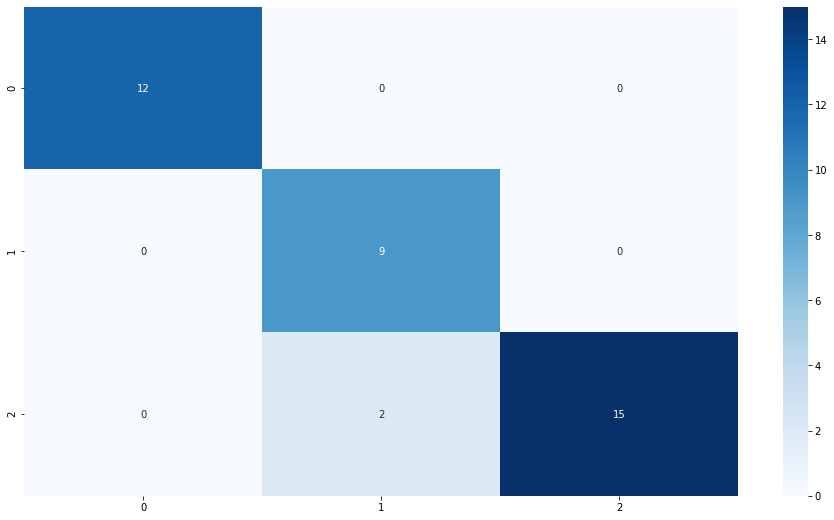

In [475]:
irisData = pd.read_csv("iris.csv")
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# SVM

In [476]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7088235294117647
Test set acc:  0.7294117647058823


Train set acc:  0.9821428571428571
Test set acc:  0.9473684210526315


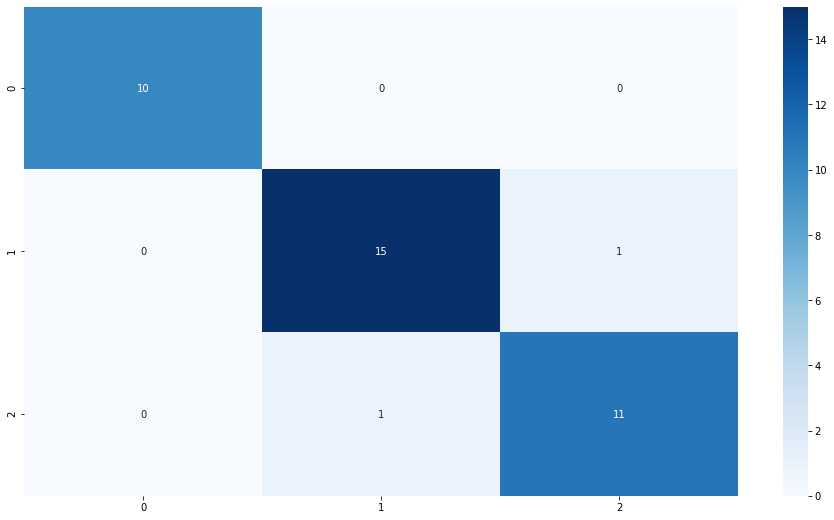

In [477]:
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# Decision Tree

In [478]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

DST = DecisionTreeClassifier(criterion="gini").fit(XTrain, YTrain)
CTest  = DST.predict(XTest)
CTrain  = DST.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7911764705882353
Test set acc:  0.8411764705882353


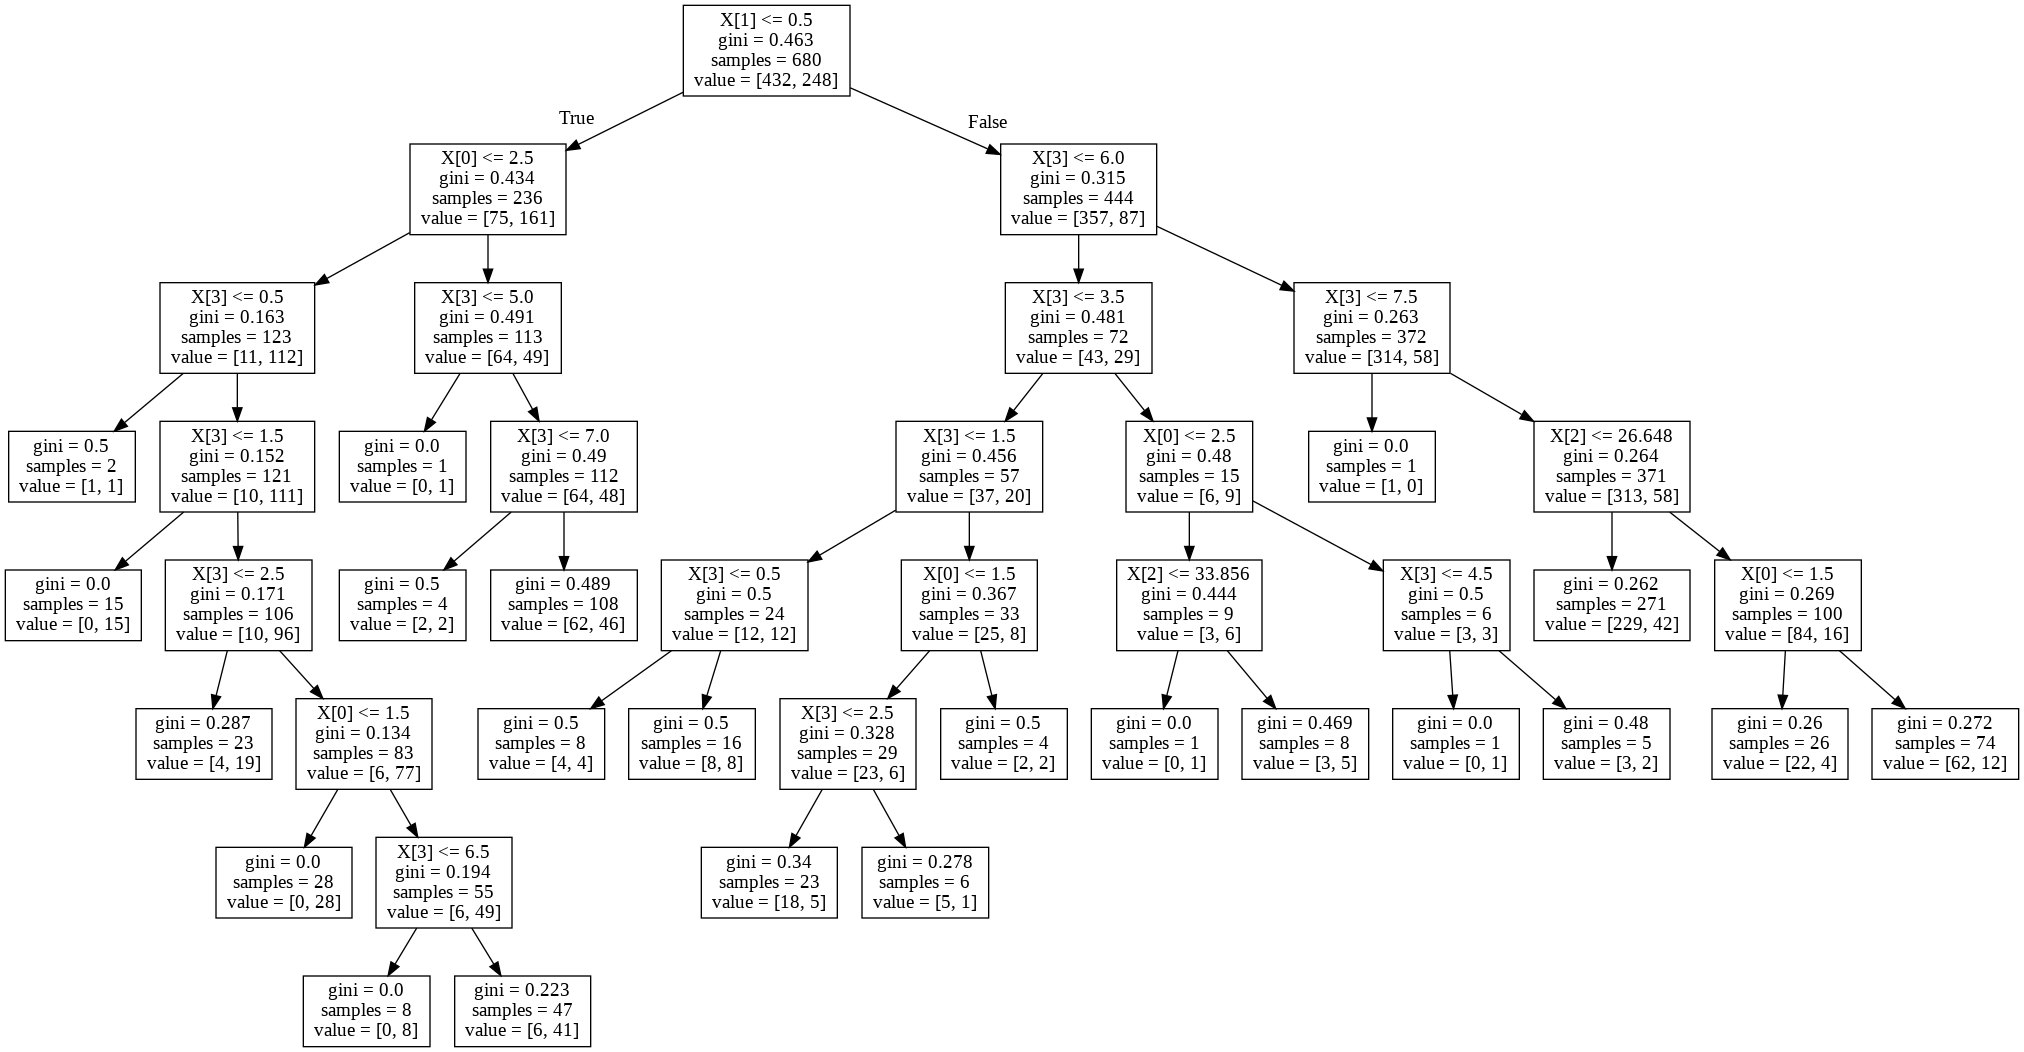

In [479]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

output = StringIO()
export_graphviz(DST, out_file = output)
graph = pydotplus.graph_from_dot_data(output.getvalue())  
Image(graph.create_png())